In [7]:
# Importar librerías necesarias
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos Wine
wine_data = load_wine()
df_wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df_wine['target'] = wine_data.target

# Visualizar las primeras filas del DataFrame
print(df_wine.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

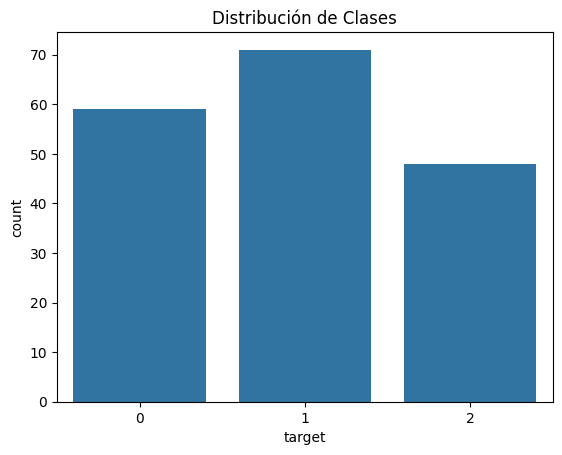

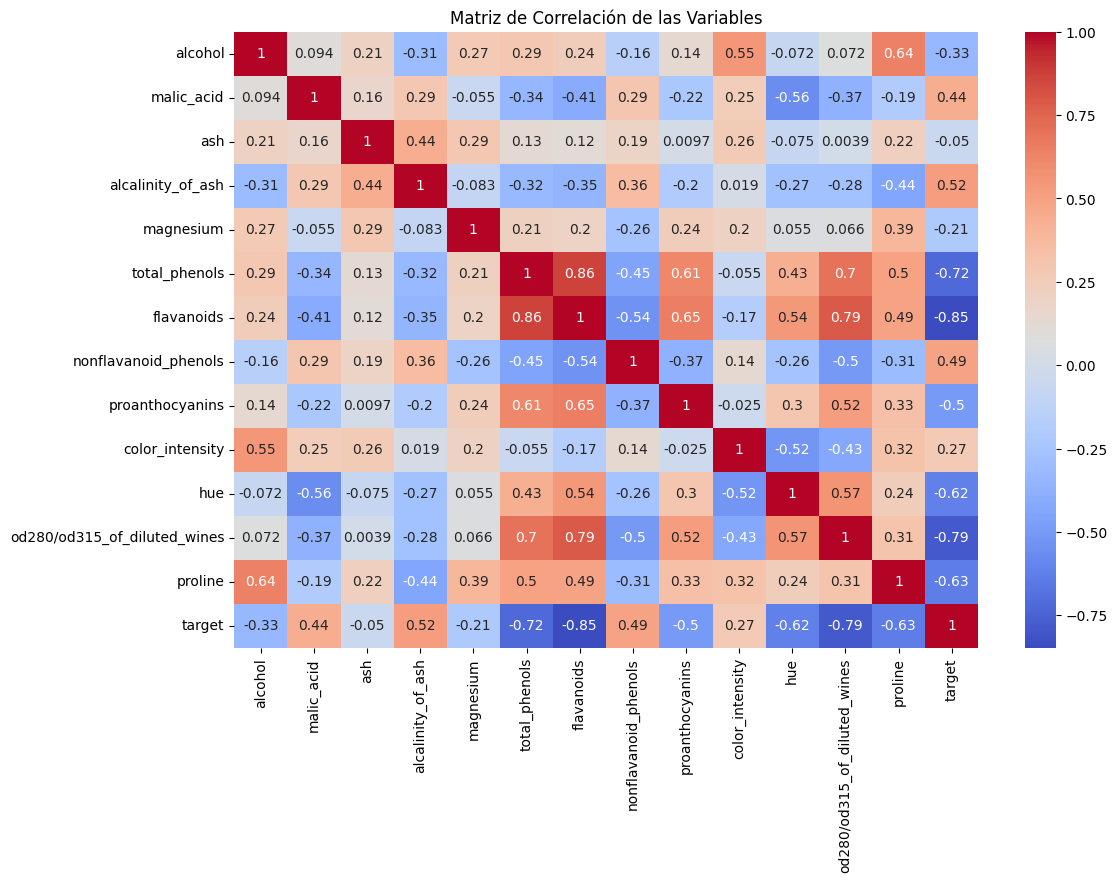

In [8]:
# Información del conjunto de datos
print(df_wine.info())

# Estadísticas descriptivas
print(df_wine.describe())

# Visualización de la distribución de clases
sns.countplot(x='target', data=df_wine)
plt.title('Distribución de Clases')
plt.show()

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_wine.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables')
plt.show()


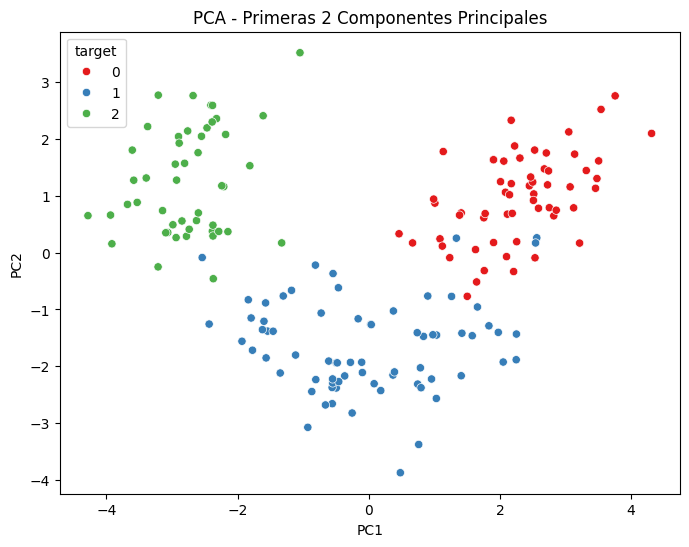

In [9]:
# Separación de características y etiquetas
X = df_wine.drop('target', axis=1)
y = df_wine['target']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)  # Reducimos a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Visualización de los componentes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title('PCA - Primeras 2 Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



<Figure size 800x600 with 0 Axes>

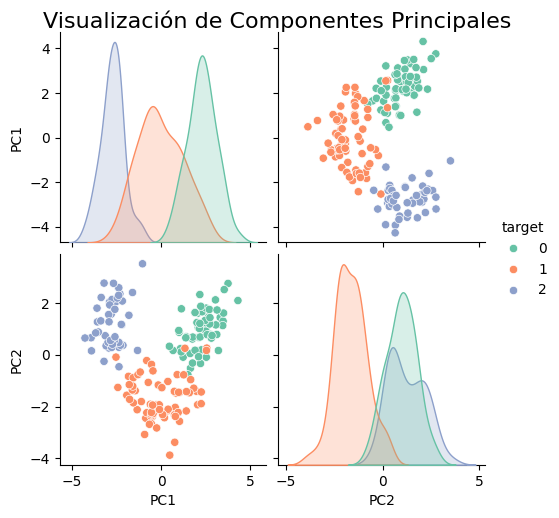

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el pairplot con ajustes
sns.pairplot(df_pca, hue='target', diag_kind='kde', height=2.5, palette='Set2')

# Añadir título fuera del gráfico para mejor visibilidad
plt.suptitle('Visualización de Componentes Principales', y=1.02, fontsize=16)
plt.show()

In [10]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("\nExactitud del modelo:", accuracy_score(y_test, y_pred))


Matriz de Confusión:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Exactitud del modelo: 1.0
